In [1]:
%load_ext cypher
%matplotlib inline
import pandas as pd

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


### Number of Tweets

In [2]:
%cypher match (n:tweet) return count(n)

1 rows affected.


count(n)
608049


### Number of users

In [3]:
%cypher match (u:user) return count(u)

1 rows affected.


count(u)
293584


### Top Tweets

In [4]:
%%cypher
match (n:tweet)-[r]-()
with n, count(r) as deg
order by deg desc
limit 10
match (n)<-[:TWEETS]-(u:user)
return u.screen_name as user, n.tid as tid, substring(n.text, 0, 20) as tweet, deg

10 rows affected.


user,tid,tweet,deg
DXXMIEN,667804078160912384,Le bilan de la prise,3101
SushmaSwaraj,667749009692356609,All 20 Indians rescu,1878
xavieraldekoa,667803133347807232,Hay fotos que valen,1750
Methone,667813005166424064,Geiselnahme in Mali:,1481
Adel__Almalki,667806449477652480,#Photo by #almalki G,1424
MehmetAkifOkur,667745075791847424,Ekranlara bakınca Tü,1278
philstockworld,667757707613614080,Draghi Fever Helps u,1171
AndreaRussett,667679902796247040,I pray that one day,1131
ShujaRabbani,667926175088377856,Must see this! :-) #,1108
Christ_Morray,667686371449044992,Doit on sérieusement,1084


### Top Users

In [5]:
%%cypher
match (n:user)-[r]-()
return n.screen_name as user, count(r) as deg
order by deg desc
limit 10

10 rows affected.


user,deg
Reuters,4424
justJasemine,3417
AFP,3370
CNN,3303
wespermee,3301
AP,3196
cnnbrk,3187
iiChattermeii,3165
DXXMIEN,3100
BBCBreaking,2785


### Top Tags

In [6]:
%%cypher
match (n:hashtag)-[r]-()
return n.hashtag as hashtags, count(r) as deg
order by deg desc
limit 10

10 rows affected.


hashtags,deg
mali,145905
bamako,24944
maliattacks,12852
isis,7749
news,7216
paris,6722
prayformali,6462
aldubsumptuouslunch,6099
radisson,5825
mtvstars,4178


### Language data

In [7]:
langs = %cypher match (n:tweet) where n.lang is not null return distinct n.lang, count(*) as num_tweets order by num_tweets desc

49 rows affected.


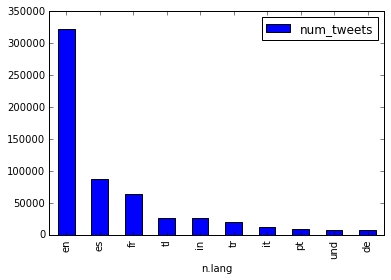

In [8]:
lang_df = langs.get_dataframe()
lang_df.set_index("n.lang")[:10].plot(kind="bar")

### % of tweets with geotags

In [9]:
%cypher match (n:tweet) return count(n)

1 rows affected.


count(n)
608049


In [10]:
%cypher match (n:tweet) where n.coordinates is not null return count(n)

1 rows affected.


count(n)
6954


In [12]:
6954 / 608049.0  # 1.1%

0.011436578302077628

### Tweets by country

In [13]:
countries = %cypher match (n:tweet) where n.coordinates is not null return distinct n.country, count(*) as num_tweets order by num_tweets desc

138 rows affected.


In [14]:
countries_df = countries.get_dataframe()

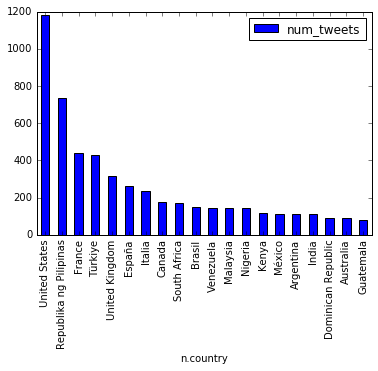

In [15]:
countries_df.set_index("n.country")[:20].plot(kind="bar")

### Average sentiment in English

In [16]:
%cypher match (n:tweet) where n.lang = "en" return avg(n.polarity) as average_en_polarity

1 rows affected.


average_en_polarity
0.005649926675726534


In [17]:
%cypher match (n:tweet) where n.lang = "en" return avg(n.subjectivity) as average_en_subjectivity

1 rows affected.


average_en_subjectivity
0.23714375054279724


### Average sentiment in French

In [18]:
%cypher match (n:tweet) where n.lang = "fr" return avg(n.polarity) as average_fr_polarity

1 rows affected.


average_fr_polarity
0.025076915147227433


In [19]:
%cypher match (n:tweet) where n.lang = "fr" return avg(n.subjectivity) as average_fr_subjectivity

1 rows affected.


average_fr_subjectivity
0.155275638351628


### Paris Twitter Stars in Mali dataset

Louis_Tomlinson

In [27]:
%%cypher
match (u:user {uid: '84279963'})
return u.screen_name

1 rows affected.


u.screen_name
Louis_Tomlinson


In [28]:
%%cypher
match (u:user {uid: '84279963'})-->(n:tweet)
return u.screen_name, n.text

0 rows affected.


u.screen_name,n.text


In [36]:
%%cypher
match (u:user {uid: '84279963'})<--(n:tweet)
return u.screen_name, n.text

1 rows affected.


u.screen_name,n.text
Louis_Tomlinson,ı love u ONE DİRECTİON @Harry_Styles @Real_Liam_Payne @Louis_Tomlinson @NiallOfficial and ZAYN MALİK @zaynmalik https://t.co/o3Oeg0HPnk


NiallOfficial

In [29]:
%%cypher
match (u:user {uid: '105119490'})
return u.screen_name

1 rows affected.


u.screen_name
NiallOfficial


In [32]:
%%cypher
match (u:user {uid: '105119490'})-->(n:tweet)
return u.screen_name, n.text

0 rows affected.


u.screen_name,n.text


In [35]:
%%cypher
match (u:user {uid: '105119490'})<--(n:tweet)
return u.screen_name, n.text

2 rows affected.


u.screen_name,n.text
NiallOfficial,@jnlynme @NiallOfficial Mali gud pagka intindi mo. Haha
NiallOfficial,ı love u ONE DİRECTİON @Harry_Styles @Real_Liam_Payne @Louis_Tomlinson @NiallOfficial and ZAYN MALİK @zaynmalik https://t.co/o3Oeg0HPnk


RecherchesP

In [33]:
%%cypher
match (u:user {uid: '4185722537'})
return u.screen_name

0 rows affected.


u.screen_name


Harry_Styles

In [37]:
%%cypher
match (u:user {uid: '181561712'})
return u.screen_name

1 rows affected.


u.screen_name
Harry_Styles


In [38]:
%%cypher
match (u:user {uid: '181561712'})-->(n:tweet)
return u.screen_name, n.text

0 rows affected.


u.screen_name,n.text


In [39]:
%%cypher
match (u:user {uid: '181561712'})<--(n:tweet)
return u.screen_name, n.text

1 rows affected.


u.screen_name,n.text
Harry_Styles,ı love u ONE DİRECTİON @Harry_Styles @Real_Liam_Payne @Louis_Tomlinson @NiallOfficial and ZAYN MALİK @zaynmalik https://t.co/o3Oeg0HPnk


infos140

In [40]:
%%cypher
match (u:user {uid: '1356382759'})
return u.screen_name

1 rows affected.


u.screen_name
infos140


In [41]:
%%cypher
match (u:user {uid: '1356382759'})-->(n:tweet)
return u.screen_name, n.text

27 rows affected.


u.screen_name,n.text
infos140,"🔴 URGENT MALI Pour rappel, le mouvement dirigé par Moktar Belmoktar, al-Mourabitoune, avait déjà revendiqué l’attaque de l’hôtel Radisson"
infos140,"🔴 ALERTE MALI Dans un communiqué à RFI et AFP à Bamako, le Front de libération du Macina revendique l’attaque qui a fait 22 morts vendredi"
infos140,🔴URGENT MALI-BELGIQUE Bruxelles annonce la mort d'un 2eme ressortissant belge hier lors de l'attaque de Bamako
infos140,🔴URGENT MALI Au moins 3 suspects activement recherchés après l’attaque de l’hôtel Radisson hier à Bamako
infos140,"🔴 MALI RAPPEL Lundi, les autorités authentifiaient un enregistrement sonore dans lequel le chef d’Ansar Dine appelait à frapper les Français"
infos140,🔴URGENT MALI Le bilan provisoire de la prise d'otages à Bamako s’élève à a3 terroristes tués et 27 morts parmi les clients et employés
infos140,🔴 MALI RAPPEL Cet appel du chef (Touareg) d’Ansar Dine à frapper les Français avait été enregistré avant les attentats à Paris de vendredi
infos140,"🔴URGENT MALI Selon source locale, les assaillants ont pénétré dans l'enceinte de l'hôtel à bord d'une voiture avec une plaque diplomatique"
infos140,"🔴 ALERTE MALI Des tirs et des explosions signalés à l’hôtel Radison de Bamako, essentiellement fréquenté par des étrangers."
infos140,🔴ALERTE MALI Des responsables de la Sécurité malienne font état d’un bilan d'au moins 22 morts


justinbieber

In [42]:
%%cypher
match (u:user {uid: '27260086'})
return u.screen_name

1 rows affected.


u.screen_name
justinbieber


In [45]:
%%cypher
match (u:user {uid: '27260086'})-->(n:tweet)
return u.screen_name, n.text

0 rows affected.


u.screen_name,n.text


In [46]:
%%cypher
match (u:user {uid: '27260086'})<--(n:tweet)
return u.screen_name, n.text

3 rows affected.


u.screen_name,n.text
justinbieber,justin yawrum follow me glw i love you bbegim follow me ebesini siktigimin mali @justinbieber #BieberOnAMAs
justinbieber,@justinbieber .SENİ ÜZENLERE KARŞI BİR SEVGİMİ BESLİYORSUN PEZEVENK..BURDA SENİN İÇİN ÖLEBİLİCEK BİR SÜRÜ BELIEBER VARKEN NEDEN SELENA MALI?
justinbieber,@ilovejanelaa @justinbieber puta! Lagi na lang ganto! Kapag successful ka nanjan sya! Pag-may nagawa kang mali. WALA NANAMAN SYA SA TABI MO!


nytimes

In [47]:
%%cypher
match (u:user {uid: '807095'})
return u.screen_name

1 rows affected.


u.screen_name
nytimes


In [48]:
%%cypher
match (u:user {uid: '807095'})-->(n:tweet)
return u.screen_name, n.text

16 rows affected.


u.screen_name,n.text
nytimes,"In the days after an attack in Mali, life goes on with little evidence of increased security https://t.co/J652a7xD2E https://t.co/ZfrrURlxWk"
nytimes,"Your Weekend Briefing: Mali, Brussels, Chicago https://t.co/uDKXe74ygg"
nytimes,RT @nytimesworld: Paris and Mali attacks expose lethal Al Qaeda-ISIS rivalry. https://t.co/JFRjEUb1qE
nytimes,What we know and don’t know about the terrorist attack in Mali https://t.co/ekkefn4NSC https://t.co/igElExNwKz
nytimes,"3 Chinese Executives Killed in Mali Attack, Company Says https://t.co/ovTb04M3aT"
nytimes,"France has a long history in Mali, where Islamic rebels have fought a three-year insurgency https://t.co/oh9vvJR4rZ https://t.co/sjS5BWefyS"
nytimes,"Gunmen arrived at Mali hotel in 'a vehicle with diplomatic plates,' pastry chef at hotel said https://t.co/uBqFytc33K"
nytimes,Breaking News: Gunmen have seized hostages at a Radisson Hotel in Mali https://t.co/DfotnG9FOm
nytimes,At least 3 people are dead after gunmen stormed a hotel in Mali and seized 170 hostages https://t.co/G7Vi101qvM
nytimes,Officials say the gunmen at the Mali hotel are no longer holding any hostages https://t.co/QHzi5OXWcb https://t.co/DiGDEYtvtd


AP

In [49]:
%%cypher
match (u:user {uid: '51241574'})
return u.screen_name

1 rows affected.


u.screen_name
AP


In [50]:
%%cypher
match (u:user {uid: '51241574'})-->(n:tweet)
return u.screen_name, n.text

27 rows affected.


u.screen_name,n.text
AP,Find breaking news and all the latest on the events in Mali on the AP Mobile App. https://t.co/LjHivHiCS5
AP,Northern separatists say Mali hotel attack that killed 19 was a clear attempt to derail fragile peace process: https://t.co/Hg9pgHsxoj
AP,Report: 6 Turkish Airlines personnel among Mali hostages: https://t.co/s5hVqDsvAe
AP,RAW VIDEO: Mali security tightens after hotel massacre https://t.co/SMDYuafvjC
AP,The Latest: Muslims in Italy protest the 'abuse' of Islam by attackers in Paris and Mali: https://t.co/tO05Lc7WHQ
AP,The Latest: Attackers arrived on foot and surprised Mali hotel guards at shift change: https://t.co/j9hOCvcJBp
AP,Chinese company says three of its executives were killed in Mali hotel attack: https://t.co/Fa9CucEGky
AP,BREAKING: Chinese company says 3 Chinese business executives among dead in Mali attack.
AP,American killed in Mali hotel attack identified as woman from suburban Maryland: https://t.co/vHUVDskSqF
AP,Keep up to date with the latest news from Mali. Get the details now in the AP Mobile app. https://t.co/LjHivHiCS5


jean_jullien 1851229334

In [51]:
%%cypher
match (u:user {uid: '1851229334'})
return u.screen_name

0 rows affected.


u.screen_name


Michael5SOS

In [52]:
%%cypher
match (u:user {uid: '403246803'})
return u.screen_name

1 rows affected.


u.screen_name
Michael5SOS


In [53]:
%%cypher
match (u:user {uid: '403246803'})-->(n:tweet)
return u.screen_name, n.text

0 rows affected.


u.screen_name,n.text


In [54]:
%%cypher
match (u:user {uid: '403246803'})<--(n:tweet)
return u.screen_name, n.text

1 rows affected.


u.screen_name,n.text
Michael5SOS,@modestclifford @Bxtchinghemmo @Luke5SOS @Ashton5SOS @Calum5SOS @Michael5SOS @5SOS Calum looks like Mali koa


taylorswift13

In [56]:
%%cypher
match (u:user {screen_name: 'taylorswift13'})
return u.screen_name, u.uid

1 rows affected.


u.screen_name,u.uid
taylorswift13,17919972


In [57]:
%%cypher
match (u:user {uid: '17919972'})-->(n:tweet)
return u.screen_name, n.text

0 rows affected.


u.screen_name,n.text


In [58]:
%%cypher
match (u:user {uid: '17919972'})<--(n:tweet)
return u.screen_name, n.text

2 rows affected.


u.screen_name,n.text
taylorswift13,@taylorswift13 what about #Nigeria #Palestine and #Mali or is #Africa &amp; #MiddleEast not included in your opinion? Or what is your view?
taylorswift13,@taylorswift13 @SwiftQuotesPage @21stCenturyGM @DEVINESTJOHN1 @StJohnsTelegram @KatyPerrysBeau1 @St @TheDivineJohn R @lairdofcamster #Mali
